# Data Munging in Python (using Pandas)

In [2]:
# Importing libraries and the data set
import pandas as pd
import numpy as np
import matplotlib as plt


In [3]:
# Reading the dataset in a dataframe using Pandas
df = pd.read_csv("E:/Data Collection/Titanic Dataset_Kaggle/train.csv")

In [3]:
# Some quick data exploration
df.head(10)  #Printing the dataset to explore first 10 row datavisually,

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [4]:
# look at summary of numerical fields by using describe() function
# It Printout summary statistics for numerical fields
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** While exploration of titanic dataset, we found a few problems in the dataset, which need to be solved before the data is ready for a good model. This exercise is typically referred as “Data Munging”. Here are the problems we discovered:**

1.	**About 31% (277 out of 891) of values in Age are missing. We expect age to play an important role and hence would want to estimate this in some manner.**

2. **While looking at the distributions, we saw that Fare seemed to contain extreme values at either end – a few tickets were probably provided free or contained data entry error. On the other hand  $512 sounds like a very high fare for booking a ticket.**

**In addition to these problems with numerical fields, we should also look at the non-numerical fields i.e. Name, Ticket and Cabin to see, if they contain any useful information.**


### Check missing values in the dataset

Let us look at Cabin to start with. First glance at the variable leaves us with an impression that there are too many NaNs in the dataset. So, let us check the number of nulls / NaNs in the dataset

In [5]:
sum(df['Cabin'].isnull()) 

687

This command should tell us the number of missing values as isnull() returns 1, if the value is null. The output is 687 – which is a lot of missing values. So, we’ll need to drop this variable.

Next, let us look at variable Ticket. Ticket looks to have mix of numbers and text and doesn’t seem to contain any information, so will drop Ticket as well.

In [6]:
df = df.drop(['Ticket','Cabin'], axis=1) 


#### How to fill missing values in Age?
There are numerous ways to fill the missing values of Age – the simplest being replacement by mean, which can be done by following code:


In [7]:
meanAge = np.mean(df.Age)
df.Age = df.Age.fillna(meanAge)

In [7]:
df.head(10)  # check the changes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C


**The other extreme could be to build a supervised learning model to predict age on the basis of other variables and then use age along with other variables to predict survival.**

Since, the purpose of this work is to bring out the steps in data munging, We’ll rather take an approach, in between these 2 extremes. 

The key hypothesis is that the salutations in **Name**, **Gender** and **Pclass** combined can provide us with information required to fill in the missing values to a large extent.

**Here are the steps required to work on this hypothesis:**

**Step 1: Extracting salutations from Name**
Let us define a function, which extracts the salutation from a Name written in this format:

Family_Name, Salutation. First Name


In [8]:
#This following function takes a Name, splits it by a comma (,), 
#then splits #it by a dot(.) and removes the whitespaces. The output
#of calling #function with ‘Jain, Mr. Kunal’ would be Mr and ‘Jain,
#Miss. Jenika’ would be Miss

def name_extract(word):
    return word.split(',')[1].split('.')[0].strip()

we apply this function to the entire column using apply() function and convert the outcome to a new DataFrame df2:

In [9]:
df2 = pd.DataFrame({'Salutation':df['Name'].apply(name_extract)})

In [10]:
df2.head(10)  # check the applied changes

,Salutation
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


Once we have the Salutations, let us look at their distribution. We use the good old groupby after merging the DataFrame df2 with DataFrame df:

In [10]:
# Merges based on index 
df = pd.merge(df,df2,left_index = True,right_index = True) 

In [11]:
df.head(10)  # check applied changes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C,Mrs


In [16]:
#Lets find and count Salutation  
temp1 = df.groupby('Salutation').PassengerId.count()

In [15]:
temp1

Salutation
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: PassengerId, dtype: int64

As we see, there are 4 main Salutations – Mr, Mrs, Miss and Master – all other are less in number. Hence, we will combine all the remaining salutations under a single salutation – Others. In order to do so, we take the same approach, as we did to extract Salutation – define a function, apply it to a new column, store the outcome in a DataFrame and then merge it with old DataFrame:

In [24]:
def group_salutation(old_salutation):
    if old_salutation == 'Mr' :
        return('Mr')
    else :
        if old_salutation == 'Mrs' :
            return('Mrs')
        else :
            if old_salutation == 'Master' :
                return('Master') 
            else : 
                if old_salutation == 'Miss' :
                    return('Miss')
                else :
                    return('Others')

In [25]:
df3 = pd.DataFrame({'New_Salutation' :df['Salutation'].apply(group_salutation)})

In [26]:
df3.head(10)  # checking applied change

,New_Salutation
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [27]:
df = pd.merge(df,df3,left_index = True,right_index = True)

In [28]:
df.head(10)  # checking applid change

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,New_Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,Mr,Mr
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q,Mr,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,S,Mr,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,S,Master,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,S,Mrs,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C,Mrs,Mrs


In [38]:
#Following is the outcome for Distribution of New_Salutation and 
#variation of Age across them:

temp1 = df.groupby('New_Salutation').count()

In [40]:
temp1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
New_Salutation,,,,,,,,,,,
Master,40,40,40,40,40,40,40,40,40,40,40
Miss,182,182,182,182,182,182,182,182,182,181,182
Mr,517,517,517,517,517,517,517,517,517,517,517
Mrs,125,125,125,125,125,125,125,125,125,124,125
Others,27,27,27,27,27,27,27,27,27,27,27


In [41]:
#Following is the outcome for Distribution of New_Salutation and 
#variation of Age across them:

temp1 = df.groupby('New_Salutation').PassengerId.count()
temp1

New_Salutation
Master     40
Miss      182
Mr        517
Mrs       125
Others     27
Name: PassengerId, dtype: int64

In [42]:
#Following is the outcome for Distribution of New_Salutation and 
#variation of Age across them:


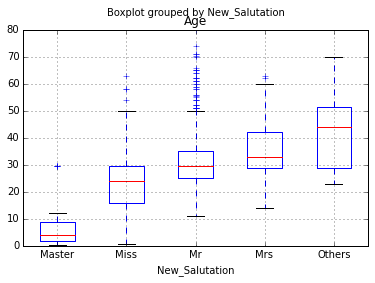

In [33]:
import matplotlib as plt
% matplotlib inline

df.boxplot(column='Age',by = 'New_Salutation')

Step 2: Creating a simple grid (Class x Gender) x Salutation

**Similarly plotting the distribution of age by Sex and Class shows a sloping:**


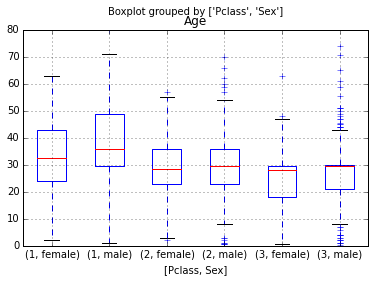

In [50]:
df.boxplot(column='Age',by = ['Pclass','Sex'])

Now, we create a Pivot table, which provides us median values for all the cells mentioned above. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of age:

In [52]:
table = df.pivot_table(values = 'Age',index = ['New_Salutation'],columns =['Pclass',
                                             'Sex'],aggfunc = np.median)

In [53]:
# Define function to return value of this pivot_table
def fage(x):
    return table[x['Pclass']][x['New_Salutation']]



In [56]:
# Replace missing values
df['Age'].fillna(df[df['Age'].isnull()].apply(fage, axis=1), inplace=True)

ValueError: invalid fill value with a <class 'pandas.core.frame.DataFrame'>

## How to treat for Outliers in distribution of Fare?

**Next, let us look at distribution of Fare by Pclass:**


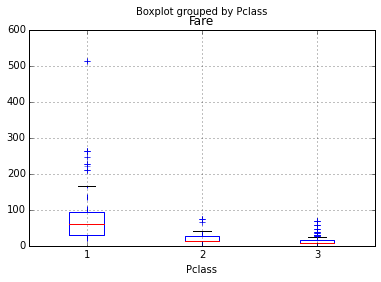

In [57]:
df.boxplot(column='Fare',by = 'Pclass')

#### As expected the means of Fare line up neatly by Pclass. However, there are a few extreme values. One particular data point which grabs attention, the fare of 512 for Class 1 – this looks like a likely error. Again there are multiple ways to impute this data – replace by mean / median of Class 1 or we can also replace the value by the second highest value, which is closer to other data points.

##### We can choose  pick and replace the values. The commands are similar to the ones mentioned above.
